# scikit-image基本操作

## 1. skimage的图像数据

In [5]:
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

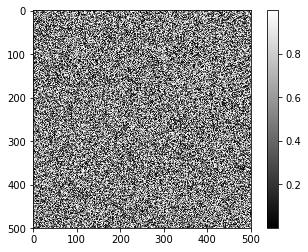

In [17]:
import numpy as np
from matplotlib import pyplot as plt

# 随机生成500x500的多维数组
random_image = np.random.random([500, 500])
#print(random_image)
plt.imshow(random_image, cmap='gray')
plt.colorbar()

<class 'numpy.ndarray'> uint8 (303, 384)


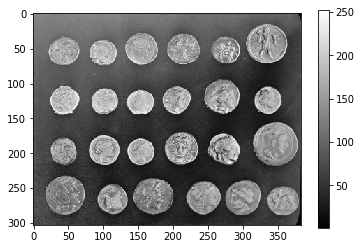

In [14]:
from skimage import data

# 加载skimage中的coin数据
coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray')
plt.colorbar()

图片形状: (300, 451, 3)
最小值/最大值: 0 231


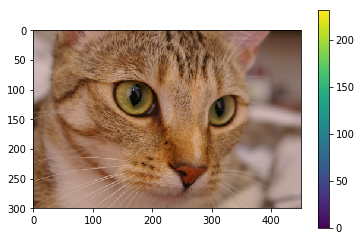

In [19]:
cat = data.chelsea()
print("图片形状:", cat.shape)
print("最小值/最大值:", cat.min(), cat.max())

plt.imshow(cat)
plt.colorbar()

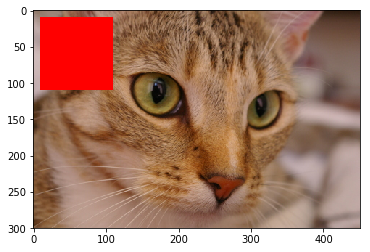

In [20]:
# 在图片上叠加一个红色方块
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat)

# 2. 数据类型和像素值

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


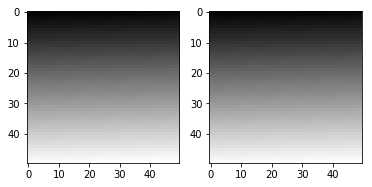

In [24]:
# 生成0-1间的2500个数据
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))

# 生成0-255间的2500个数据
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray')

In [26]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image) # 像素值范围：0-1
image_ubyte = img_as_ubyte(image) # 像素值范围：0-255

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.) # 验证0-255 转换到 0-1

type, min, max: float64 0.0 0.905882352941
type, min, max: uint8 0 231
231/255 = 0.9058823529411765


# 3. 显示图像

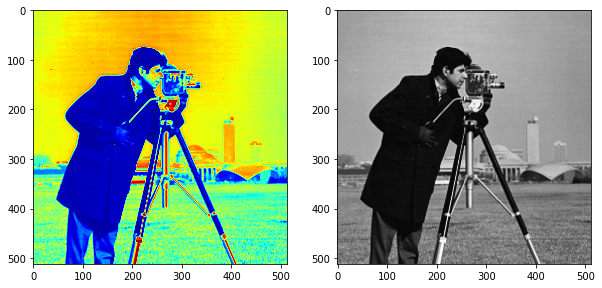

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

image = data.camera()

fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

# 使用不同的color map
ax_jet.imshow(image, cmap='jet')
ax_gray.imshow(image, cmap='gray');

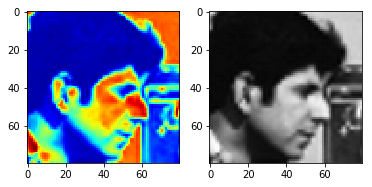

In [29]:
# 通过数组切片操作获取人脸区域
face = image[80:160, 200:280]
fig, (ax_jet, ax_gray) = plt.subplots(ncols=2)
ax_jet.imshow(face, cmap='jet')
ax_gray.imshow(face, cmap='gray');

# 4. 图像I/O

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include matplotlib, pillow, imageio, imread, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whatever option is available:

<class 'numpy.ndarray'>


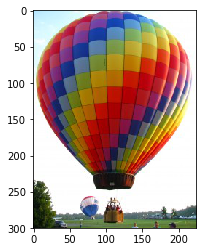

In [32]:
from skimage import io
image = io.imread('./images/balloon.jpg')

print(type(image))
plt.imshow(image);

In [33]:
# 同时加载多个图像
ic = io.imread_collection('./images/*.png')

print(type(ic), '\n\n', ic)

<class 'skimage.io.collection.ImageCollection'> 

 ['./images\\data_analysis.png', './images\\python_logo.png', './images\\xiaoxiang_logo.png']


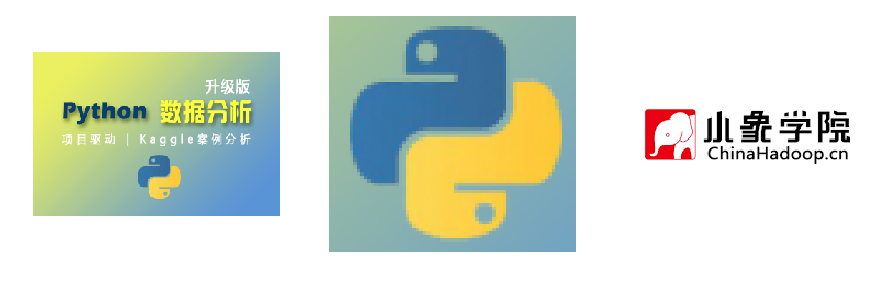

In [34]:
f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize=(15, 10))

for i, image in enumerate(ic):
    axes[i].imshow(image)
    axes[i].axis('off')

In [37]:
# 保存图像
saved_img = ic[0]
io.imsave('./output/python_analysis.png', saved_img)